In [1]:
import cupy as cp
import numpy as np
import time
import kdezero
import kdezero.functions as F
import kdezero.layers as L
import kdezero.functions_conv as Fc
from kdezero import optimizers
from kdezero import DataLoader
from kdezero import test_mode
from kdezero.models import MLP, VGG16, Model
from kdezero import cuda
from kdezero import Variable
from kdezero import SeqDataLoader
from PIL import Image
import os
import matplotlib.pyplot as plt

In [1]:
x = cp.arange(6).reshape(2, 3)
print(x)

y = x.sum(axis=1)
print(y)

[[0 1 2]
 [3 4 5]]
[ 3 12]


In [2]:
cp.asarray(np.array([[1, 2], [1, 2]]))

array([[1, 2],
       [1, 2]])

In [6]:
max_epoch = 5
batch_size = 100

train_set = kdezero.datasets.MNIST(train=True)
test_set = kdezero.datasets.MNIST(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

model = MLP((1000, 10), activation=F.relu)
optimizer = optimizers.Adam().setup(model)

if kdezero.cuda.gpu_enable:
    train_loader.to_gpu()
    test_loader.to_gpu()
    model.to_gpu()
    print('use gpu')
    for param in model.params():
        print(param.name, type(param.data))

for epoch in range(max_epoch):
    start = time.time()
    sum_loss, sum_acc = 0, 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    elapsed_time = time.time() - start
    print('epoch: {}'.format(epoch + 1))
    print('train loss: {:.4f}, accuracy: {:.4f}, time: {:.4f}[sec]'.format(
        sum_loss / len(train_set), sum_acc / len(train_set), elapsed_time
    ))

    sum_loss, sum_acc = 0, 0
    with kdezero.no_grad():
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y, t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)

    print('test loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(test_set), sum_acc / len(test_set)
    ))

use gpu
W <class 'NoneType'>
b <class 'cupy.core.core.ndarray'>
W <class 'NoneType'>
b <class 'cupy.core.core.ndarray'>
epoch: 1
train loss: 0.2400, accuracy: 0.9317, time: 10.5564[sec]
test loss: 0.1115, accuracy: 0.9649
epoch: 2
train loss: 0.0889, accuracy: 0.9738, time: 2.9747[sec]
test loss: 0.0826, accuracy: 0.9737
epoch: 3
train loss: 0.0561, accuracy: 0.9825, time: 2.9721[sec]
test loss: 0.0631, accuracy: 0.9791
epoch: 4
train loss: 0.0379, accuracy: 0.9883, time: 2.9859[sec]
test loss: 0.0707, accuracy: 0.9772
epoch: 5
train loss: 0.0270, accuracy: 0.9921, time: 2.9826[sec]
test loss: 0.0610, accuracy: 0.9827


In [7]:
max_epoch = 5
batch_size = 100

train_set = kdezero.datasets.MNIST(train=True)
test_set = kdezero.datasets.MNIST(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

model = MLP((1000, 10), activation=F.relu)
optimizer = optimizers.Adam().setup(model)

kdezero.cuda.gpu_enable = False

if kdezero.cuda.gpu_enable:
    train_loader.to_gpu()
    test_loader.to_gpu()
    model.to_gpu()
    print('use gpu')
    for param in model.params():
        print(param.name, type(param.data))

for epoch in range(max_epoch):
    start = time.time()
    sum_loss, sum_acc = 0, 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    elapsed_time = time.time() - start
    print('epoch: {}'.format(epoch + 1))
    print('train loss: {:.4f}, accuracy: {:.4f}, time: {:.4f}[sec]'.format(
        sum_loss / len(train_set), sum_acc / len(train_set), elapsed_time
    ))

    sum_loss, sum_acc = 0, 0
    with kdezero.no_grad():
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y, t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)

    print('test loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(test_set), sum_acc / len(test_set)
    ))

kdezero.cuda.gpu_enable = True

epoch: 1
train loss: 0.2355, accuracy: 0.9325, time: 8.2682[sec]
test loss: 0.1067, accuracy: 0.9681
epoch: 2
train loss: 0.0876, accuracy: 0.9740, time: 8.2117[sec]
test loss: 0.0909, accuracy: 0.9717
epoch: 3
train loss: 0.0548, accuracy: 0.9833, time: 8.2465[sec]
test loss: 0.0597, accuracy: 0.9812
epoch: 4
train loss: 0.0377, accuracy: 0.9881, time: 8.2149[sec]
test loss: 0.0624, accuracy: 0.9803
epoch: 5
train loss: 0.0267, accuracy: 0.9918, time: 8.1658[sec]
test loss: 0.0649, accuracy: 0.9805


In [3]:
max_epoch = 3
batch_size = 100

train_set = kdezero.datasets.MNIST(train=True)
train_loader = DataLoader(train_set, batch_size)
model = MLP((1000, 10), activation=F.relu)
optimizer = optimizers.SGD().setup(model)

if os.path.exists('my_mlp.npz'):
    model.load_weights('my_mlp.npz')

# if kdezero.cuda.gpu_enable:
#     train_loader.to_gpu()
#     model.to_gpu()

for epoch in range(max_epoch):
    sum_loss = 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        sum_loss += float(loss.data) * len(t)

    print('epoch: {}, loss: {:.4f}'.format(epoch + 1, sum_loss / len(train_set)))

model.save_weights('my_mlp.npz')

epoch: 1, loss: 0.3519
epoch: 2, loss: 0.3259
epoch: 3, loss: 0.3069


In [4]:
x = np.ones(5)
print(x)

y = F.dropout(x)
print(y)

with test_mode():
    y = F.dropout(x)
    print(y)

[1. 1. 1. 1. 1.]
variable([0. 0. 0. 0. 2.])
variable([1. 1. 1. 1. 1.])


In [15]:
x1 = np.random.rand(2, 3, 3, 2)
print(x1)
col1 = Fc.im2col_array(x1, 2, 1, 0, False)
print(col1.shape)
print(col1)
print(col1.transpose((0, 4, 5, 1, 2, 3)))
col1 = Fc.im2col_array(x1, 2, 1, 0, True)
print(col1.shape)
print(col1)

[[[[0.6670127  0.0248459 ]
   [0.5241646  0.39166727]
   [0.18874425 0.95472067]]

  [[0.6325169  0.99474125]
   [0.75912171 0.8547945 ]
   [0.85153181 0.21451058]]

  [[0.2181054  0.01134283]
   [0.09398274 0.43514516]
   [0.45302568 0.28858466]]]


 [[[0.16799346 0.86193962]
   [0.4069726  0.44757548]
   [0.0838437  0.36718223]]

  [[0.53192182 0.35719726]
   [0.11346258 0.35268482]
   [0.90338458 0.3508892 ]]

  [[0.86651975 0.78014765]
   [0.31219945 0.36417285]
   [0.71205805 0.88539019]]]]
(2, 3, 2, 2, 2, 1)
[[[[[[0.6670127 ]
     [0.5241646 ]]

    [[0.0248459 ]
     [0.39166727]]]


   [[[0.5241646 ]
     [0.18874425]]

    [[0.39166727]
     [0.95472067]]]]



  [[[[0.6325169 ]
     [0.75912171]]

    [[0.99474125]
     [0.8547945 ]]]


   [[[0.75912171]
     [0.85153181]]

    [[0.8547945 ]
     [0.21451058]]]]



  [[[[0.2181054 ]
     [0.09398274]]

    [[0.01134283]
     [0.43514516]]]


   [[[0.09398274]
     [0.45302568]]

    [[0.43514516]
     [0.28858466]]]]]




 [[[

In [29]:
array_shape = (1, 2, 3, 4, 5, 6)

x1 = np.arange(np.prod(array_shape)).reshape(array_shape)
print(x1)
print(x1.transpose((0, 4, 5, 1, 2, 3)).shape)
print(x1.transpose((0, 4, 5, 1, 2, 3)))
print(x1.transpose((0, 4, 5, 1, 2, 3)).reshape(8, -1))

[[[[[[  0   1   2   3   4   5]
     [  6   7   8   9  10  11]
     [ 12  13  14  15  16  17]
     [ 18  19  20  21  22  23]
     [ 24  25  26  27  28  29]]

    [[ 30  31  32  33  34  35]
     [ 36  37  38  39  40  41]
     [ 42  43  44  45  46  47]
     [ 48  49  50  51  52  53]
     [ 54  55  56  57  58  59]]

    [[ 60  61  62  63  64  65]
     [ 66  67  68  69  70  71]
     [ 72  73  74  75  76  77]
     [ 78  79  80  81  82  83]
     [ 84  85  86  87  88  89]]

    [[ 90  91  92  93  94  95]
     [ 96  97  98  99 100 101]
     [102 103 104 105 106 107]
     [108 109 110 111 112 113]
     [114 115 116 117 118 119]]]


   [[[120 121 122 123 124 125]
     [126 127 128 129 130 131]
     [132 133 134 135 136 137]
     [138 139 140 141 142 143]
     [144 145 146 147 148 149]]

    [[150 151 152 153 154 155]
     [156 157 158 159 160 161]
     [162 163 164 165 166 167]
     [168 169 170 171 172 173]
     [174 175 176 177 178 179]]

    [[180 181 182 183 184 185]
     [186 187 188 189 190

In [37]:
x = cuda.as_cupy(x1)
xp = cuda.get_array_module(x)
if xp == np:
    print('non')
x.reduced_view()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [2]:
array_shape = (2, 3, 4, 3)

x1 = cp.arange(np.prod(array_shape)).reshape(array_shape)
col1 = Fc.im2col_array(x1, 2, 1, 0, True)
print(x1)
print(col1)
print(col1.shape)

[[[[ 0  1  2]
   [ 3  4  5]
   [ 6  7  8]
   [ 9 10 11]]

  [[12 13 14]
   [15 16 17]
   [18 19 20]
   [21 22 23]]

  [[24 25 26]
   [27 28 29]
   [30 31 32]
   [33 34 35]]]


 [[[36 37 38]
   [39 40 41]
   [42 43 44]
   [45 46 47]]

  [[48 49 50]
   [51 52 53]
   [54 55 56]
   [57 58 59]]

  [[60 61 62]
   [63 64 65]
   [66 67 68]
   [69 70 71]]]]
[[ 0  1  3  4 12 13 15 16 24 25 27 28]
 [ 1  2  4  5 13 14 16 17 25 26 28 29]
 [ 3  4  6  7 15 16 18 19 27 28 30 31]
 [ 4  5  7  8 16 17 19 20 28 29 31 32]
 [ 6  7  9 10 18 19 21 22 30 31 33 34]
 [ 7  8 10 11 19 20 22 23 31 32 34 35]
 [36 37 39 40 48 49 51 52 60 61 63 64]
 [37 38 40 41 49 50 52 53 61 62 64 65]
 [39 40 42 43 51 52 54 55 63 64 66 67]
 [40 41 43 44 52 53 55 56 64 65 67 68]
 [42 43 45 46 54 55 57 58 66 67 69 70]
 [43 44 46 47 55 56 58 59 67 68 70 71]]
(12, 12)


In [ ]:
(2, 3, 2, 2, 3, 2)

In [3]:
array_shape = (2, 3, 4, 3)

x1 = np.arange(np.prod(array_shape)).reshape(array_shape)
col1 = Fc.im2col_array(x1, 2, 1, 0, False)
print(x1)
print(col1)
print(col1.shape)

[[[[ 0  1  2]
   [ 3  4  5]
   [ 6  7  8]
   [ 9 10 11]]

  [[12 13 14]
   [15 16 17]
   [18 19 20]
   [21 22 23]]

  [[24 25 26]
   [27 28 29]
   [30 31 32]
   [33 34 35]]]


 [[[36 37 38]
   [39 40 41]
   [42 43 44]
   [45 46 47]]

  [[48 49 50]
   [51 52 53]
   [54 55 56]
   [57 58 59]]

  [[60 61 62]
   [63 64 65]
   [66 67 68]
   [69 70 71]]]]
[[[[[[ 0  1]
     [ 3  4]
     [ 6  7]]

    [[ 1  2]
     [ 4  5]
     [ 7  8]]]


   [[[ 3  4]
     [ 6  7]
     [ 9 10]]

    [[ 4  5]
     [ 7  8]
     [10 11]]]]



  [[[[12 13]
     [15 16]
     [18 19]]

    [[13 14]
     [16 17]
     [19 20]]]


   [[[15 16]
     [18 19]
     [21 22]]

    [[16 17]
     [19 20]
     [22 23]]]]



  [[[[24 25]
     [27 28]
     [30 31]]

    [[25 26]
     [28 29]
     [31 32]]]


   [[[27 28]
     [30 31]
     [33 34]]

    [[28 29]
     [31 32]
     [34 35]]]]]




 [[[[[36 37]
     [39 40]
     [42 43]]

    [[37 38]
     [40 41]
     [43 44]]]


   [[[39 40]
     [42 43]
     [45 46]]

    [[40 41]

In [6]:
N, C, H, W = 1, 5, 15, 15
OC, (KH, KW) = 8, (3, 3)

x = Variable(np.random.randn(N, C, H, W))
W = np.random.randn(OC, C, KH, KW)
y = Fc.conv2d(x, W, b=None, stride=1, pad=1)
y.backward()

print(y.shape)
print(x.grad.shape)

(1, 8, 15, 15)
(1, 5, 15, 15)


Downloading: vgg16.npz
[##############################] 100.00% Done


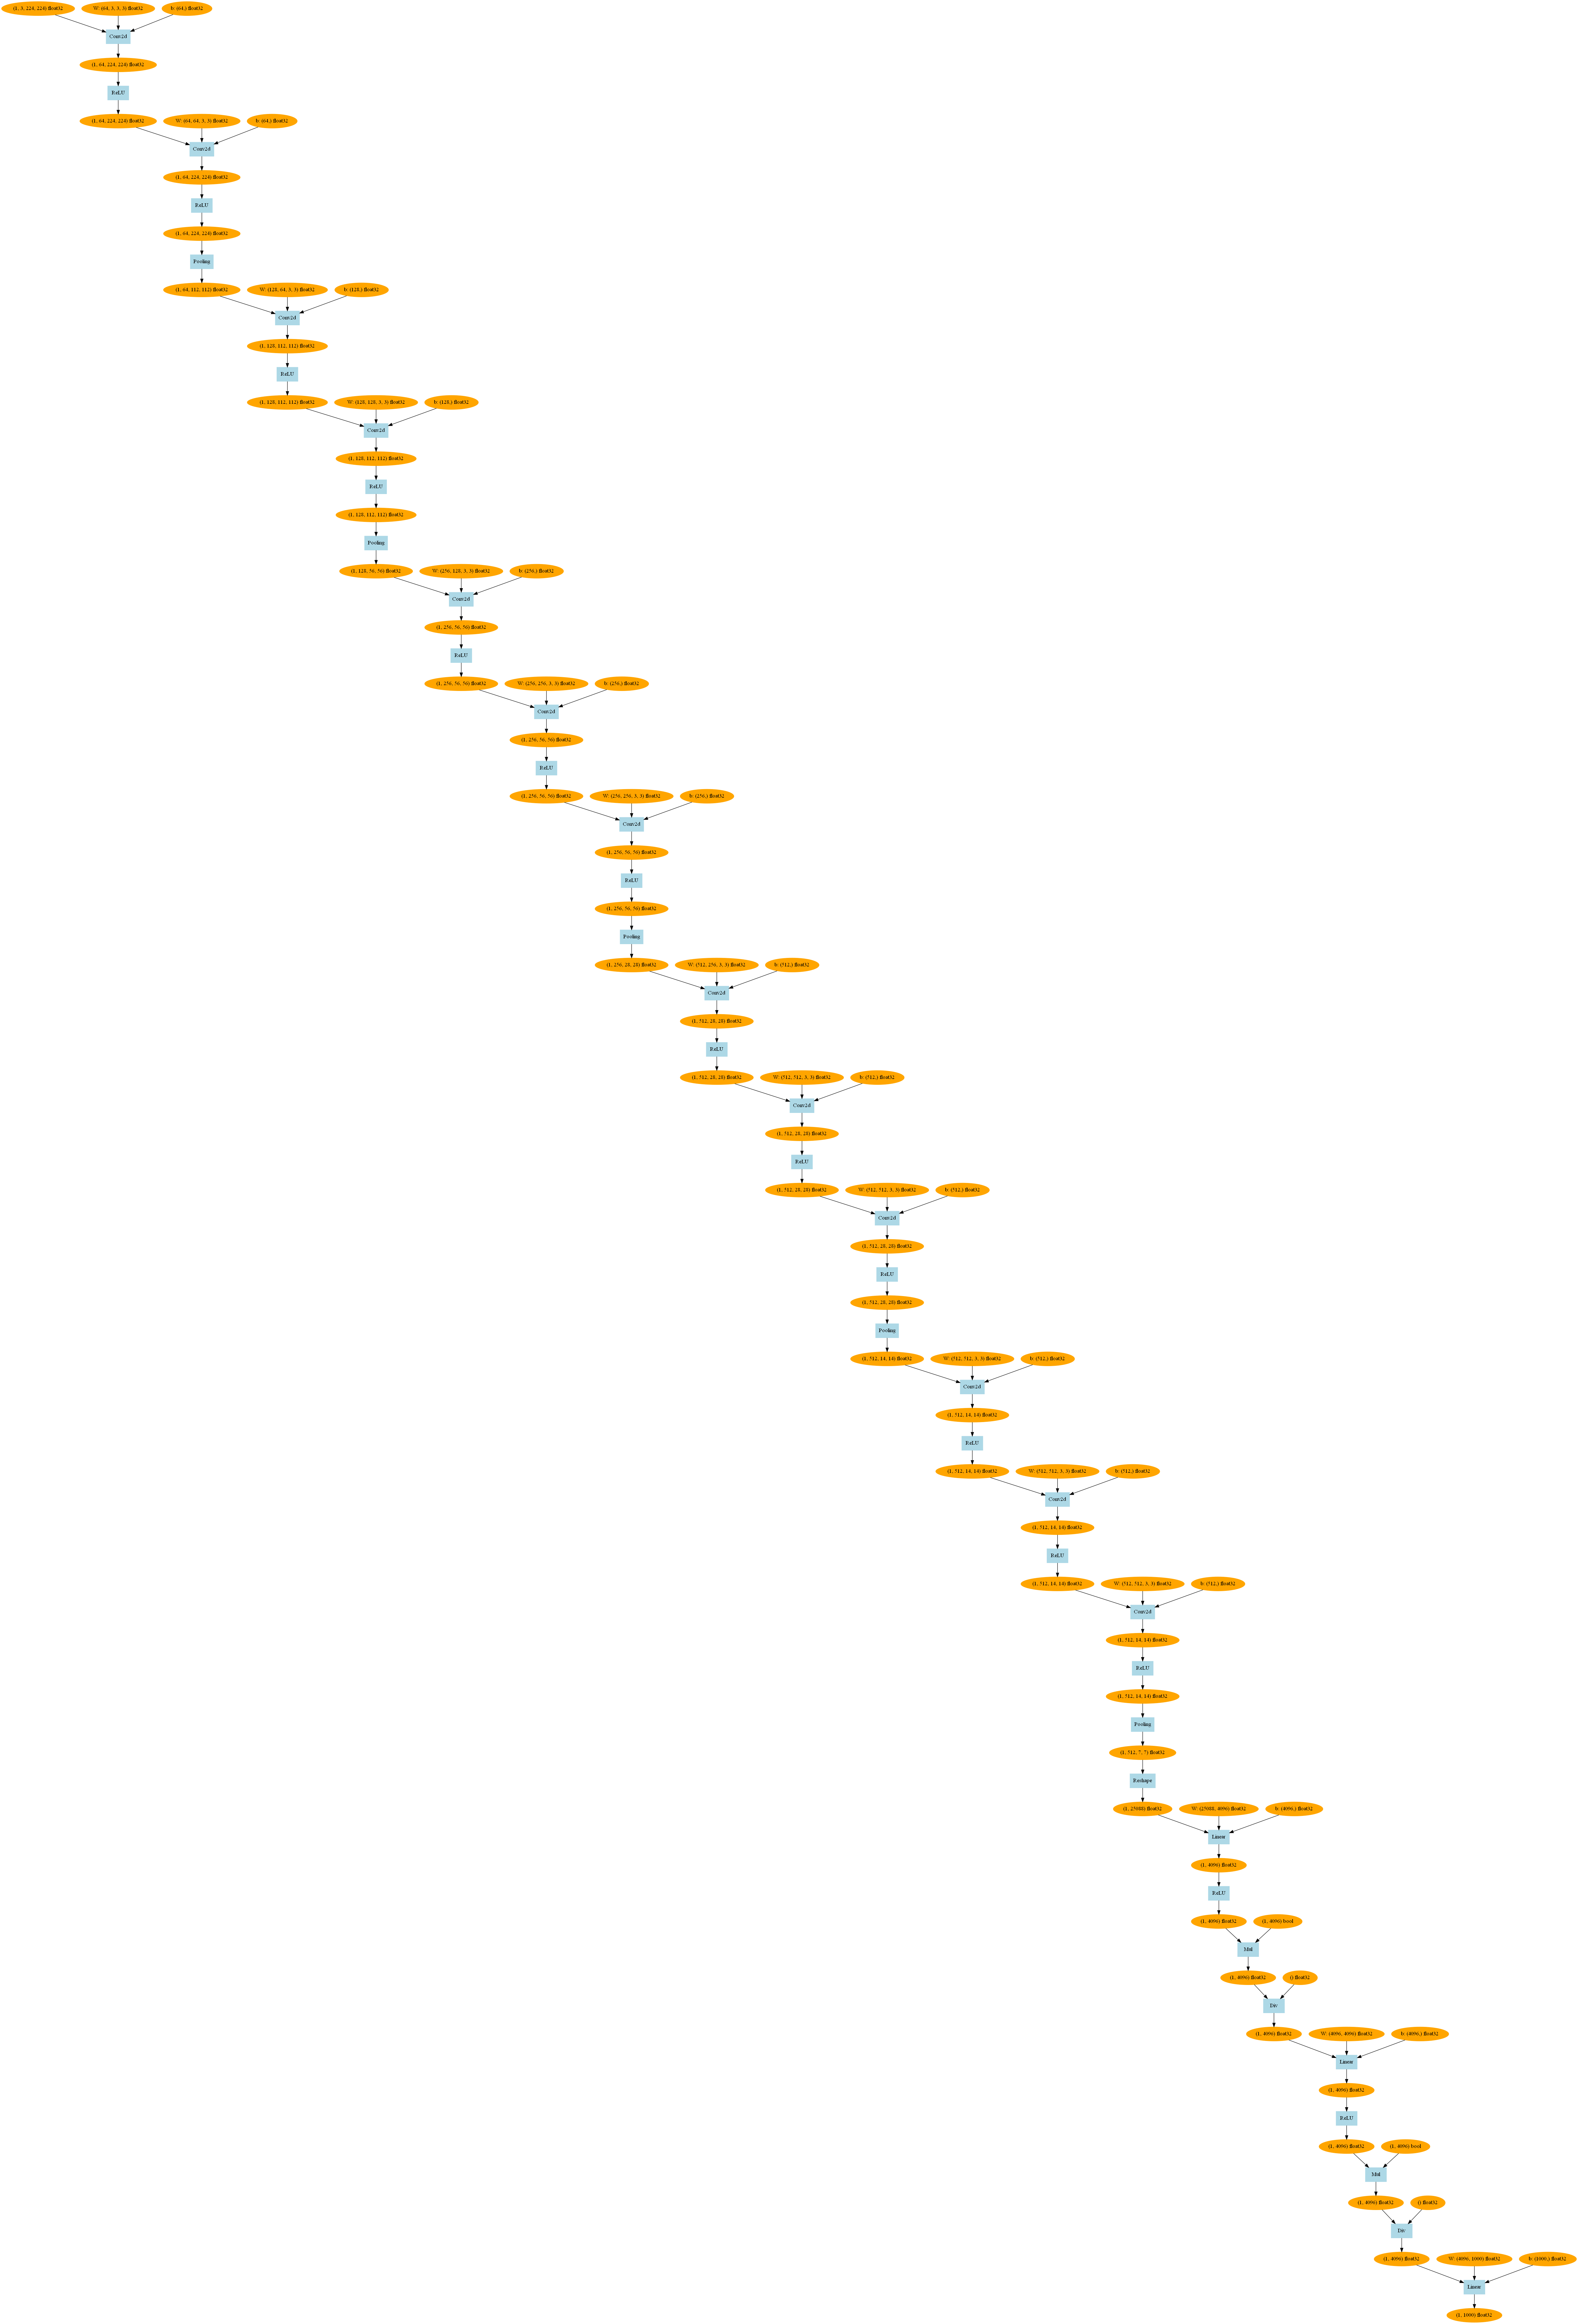

In [2]:
model = VGG16(pretraind=True)

x = np.random.randn(1, 3, 224, 224).astype(np.float32)
model.plot(x)

In [2]:
url = 'https://github.com/oreilly-japan/deep-learning-from-scratch-3/raw/images/zebra.jpg'
img_path = kdezero.utils.get_file(url, file_dir='.')
img = Image.open(img_path)
img.show()

Downloading: zebra.jpg
[##############################] 100.00% Done


In [2]:
url = 'https://github.com/oreilly-japan/deep-learning-from-scratch-3/raw/images/zebra.jpg'
img_path = kdezero.utils.get_file(url, file_dir='.')
img = Image.open(img_path)
x = VGG16.preprocess(img)
x = x[np.newaxis]

model = VGG16(pretraind=True)
with kdezero.test_mode():
    y = model(x)
predict_id = np.argmax(y.data)

model.plot(x, to_file='vgg.pdf')
labels = kdezero.datasets.ImageNet.labels()
print(labels[predict_id])

Downloading: imagenet1000_clsidx_to_labels.txt
[##############################] 100.00% Done
zebra


In [4]:
rnn = L.RNN(10)
x = np.random.rand(1, 1)
h = rnn(x)
print(h.shape)

(1, 10)


999
(array([-0.01522355]), array([-0.02960585]))
(array([-0.02960585]), array([-0.01180334]))
(array([-0.01180334]), array([0.01078398]))


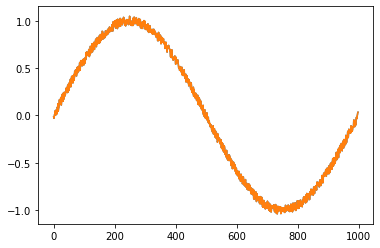

In [2]:
train_set = kdezero.datasets.SinCurve(train=True)
print(len(train_set))
print(train_set[0])
print(train_set[1])
print(train_set[2])

xs = [example[0] for example in train_set]
ts = [example[0] for example in train_set]
plt.plot(np.arange(len(xs)), xs, label='xs')
plt.plot(np.arange(len(xs)), xs, label='ts')
plt.show()

In [11]:
class SimpleRNN(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.rnn = L.RNN(hidden_size)
        self.fc = L.Linear(out_size)
    
    def reset_state(self):
        self.rnn.reset_state()

    def forward(self, x):
        h = self.rnn(x)
        y = self.fc(h)
        return y

max_epoch = 100
hidden_size = 100
bptt_length = 30

train_set = kdezero.datasets.SinCurve(train=True)
seqlen = len(train_set)

model = SimpleRNN(hidden_size, 1)
optimizers = kdezero.optimizers.Adam().setup(model)

for epoch in range(max_epoch):
    model.reset_state()
    loss, count = 0, 0
    for x, t in train_set:
        x = x.reshape(1, 1)
        y = model(x)
        loss += F.mean_squared_error(y, t)
        count += 1

        if count % bptt_length == 0 or count == seqlen:
            model.cleargrads()
            loss.backward()
            loss.unchain_backward()
            optimizers.update()

        avg_loss = float(loss.data) / count
        print('| epoch %d | loss %f' % (epoch + 1, avg_loss))

.005742
| epoch 100 | loss 0.005725
| epoch 100 | loss 0.005712
| epoch 100 | loss 0.005695
| epoch 100 | loss 0.005686
| epoch 100 | loss 0.005667
| epoch 100 | loss 0.005648
| epoch 100 | loss 0.005631
| epoch 100 | loss 0.005615
| epoch 100 | loss 0.005596
| epoch 100 | loss 0.005580
| epoch 100 | loss 0.005571
| epoch 100 | loss 0.005552
| epoch 100 | loss 0.005536
| epoch 100 | loss 0.005519
| epoch 100 | loss 0.005501
| epoch 100 | loss 0.005532
| epoch 100 | loss 0.005519
| epoch 100 | loss 0.005514
| epoch 100 | loss 0.005507
| epoch 100 | loss 0.005490
| epoch 100 | loss 0.005495
| epoch 100 | loss 0.005483
| epoch 100 | loss 0.005480
| epoch 100 | loss 0.005485
| epoch 100 | loss 0.005484
| epoch 100 | loss 0.005466
| epoch 100 | loss 0.005468
| epoch 100 | loss 0.005456
| epoch 100 | loss 0.005442
| epoch 100 | loss 0.005428
| epoch 100 | loss 0.005431
| epoch 100 | loss 0.005438
| epoch 100 | loss 0.005430
| epoch 100 | loss 0.005438
| epoch 100 | loss 0.005422
| epoch 100 

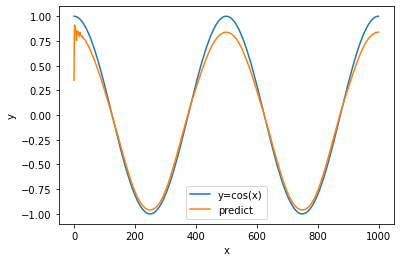

In [12]:
xs = np.cos(np.linspace(0, 4 * np.pi, 1000))
model.reset_state()
pred_list = []

with kdezero.no_grad():
    for x in xs:
        x = np.array(x).reshape(1, 1)
        y = model(x)
        pred_list.append(float(y.data))

plt.plot(np.arange(len(xs)), xs, label='y=cos(x)')
plt.plot(np.arange(len(xs)), pred_list, label='predict')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [8]:
train_set = kdezero.datasets.SinCurve(train=True)
dataloader = kdezero.dataloaders.SeqDataLoader(train_set, batch_size=3)
x, t = next(dataloader)
print(x)
print('----------')
print(t)

[[-0.02734373]
 [ 0.85912007]
 [-0.86360745]]
----------
[[-0.01885917]
 [ 0.85278804]
 [-0.8312927 ]]


In [2]:
class BetterRNN(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.rnn = L.LSTM(hidden_size)
        self.fc = L.Linear(out_size)
    
    def reset_state(self):
        self.rnn.reset_state()

    def forward(self, x):
        h = self.rnn(x)
        y = self.fc(h)
        return y

max_epoch = 100
batch_size = 30
hidden_size = 100
bptt_length = 30

train_set = kdezero.datasets.SinCurve(train=True)
dataloder = SeqDataLoader(train_set, batch_size=batch_size)
seqlen = len(train_set)

model = BetterRNN(hidden_size, 1)
optimizers = kdezero.optimizers.Adam().setup(model)

for epoch in range(max_epoch):
    model.reset_state()
    loss, count = 0, 0
    for x, t in dataloder:
        y = model(x)
        loss += F.mean_squared_error(y, t)
        count += 1

        if count % bptt_length == 0 or count == seqlen:
            model.cleargrads()
            loss.backward()
            loss.unchain_backward()
            optimizers.update()

        avg_loss = float(loss.data) / count
        print('| epoch %d | loss %f' % (epoch + 1, avg_loss))

oss 0.036226
| epoch 79 | loss 0.032747
| epoch 79 | loss 0.029917
| epoch 79 | loss 0.027509
| epoch 79 | loss 0.025479
| epoch 79 | loss 0.023744
| epoch 79 | loss 0.022251
| epoch 79 | loss 0.020998
| epoch 79 | loss 0.019845
| epoch 79 | loss 0.018810
| epoch 79 | loss 0.017877
| epoch 79 | loss 0.017026
| epoch 79 | loss 0.016260
| epoch 79 | loss 0.015576
| epoch 79 | loss 0.014970
| epoch 79 | loss 0.014396
| epoch 79 | loss 0.013884
| epoch 79 | loss 0.013391
| epoch 79 | loss 0.012948
| epoch 79 | loss 0.012542
| epoch 79 | loss 0.012171
| epoch 79 | loss 0.011809
| epoch 79 | loss 0.011464
| epoch 79 | loss 0.011164
| epoch 79 | loss 0.010851
| epoch 79 | loss 0.010574
| epoch 80 | loss 0.228634
| epoch 80 | loss 0.145871
| epoch 80 | loss 0.102001
| epoch 80 | loss 0.077672
| epoch 80 | loss 0.062795
| epoch 80 | loss 0.052822
| epoch 80 | loss 0.045742
| epoch 80 | loss 0.040269
| epoch 80 | loss 0.035965
| epoch 80 | loss 0.032509
| epoch 80 | loss 0.029702
| epoch 80 | lo

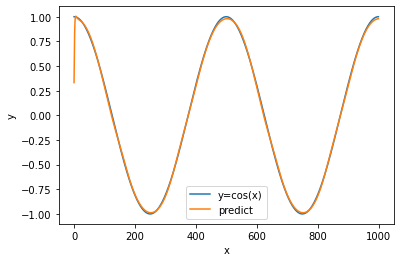

In [3]:
xs = np.cos(np.linspace(0, 4 * np.pi, 1000))
model.reset_state()
pred_list = []

with kdezero.no_grad():
    for x in xs:
        x = np.array(x).reshape(1, 1)
        y = model(x)
        pred_list.append(float(y.data))

plt.plot(np.arange(len(xs)), xs, label='y=cos(x)')
plt.plot(np.arange(len(xs)), pred_list, label='predict')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()